In [16]:
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")
df = pd.read_csv(path + "\\Titanic-Dataset.csv")

print("First 5 records:", df.head())

First 5 records:    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


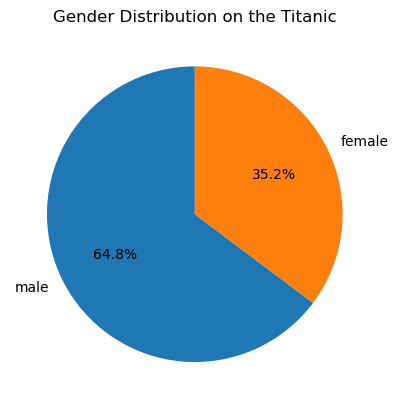

In [29]:
import matplotlib.pyplot as plt

# Count males vs females
gender_counts = df['Sex'].value_counts()

# Plot pie chart
gender_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel=''
)

plt.title('Gender Distribution on the Titanic')
plt.show()


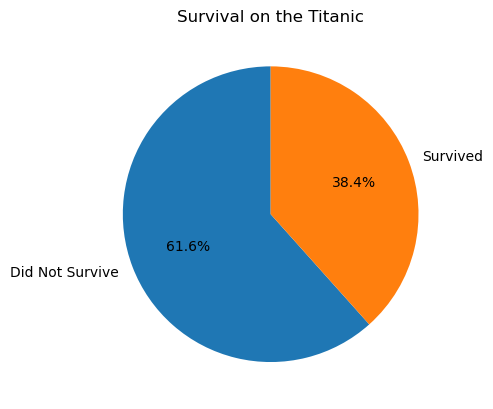

In [33]:
# Count survival
survival_counts = df['Survived'].value_counts()

# Rename values for readability
survival_counts.index = ['Did Not Survive', 'Survived']

# Plot pie chart
survival_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel=''
)

plt.title('Survival on the Titanic')
plt.show()


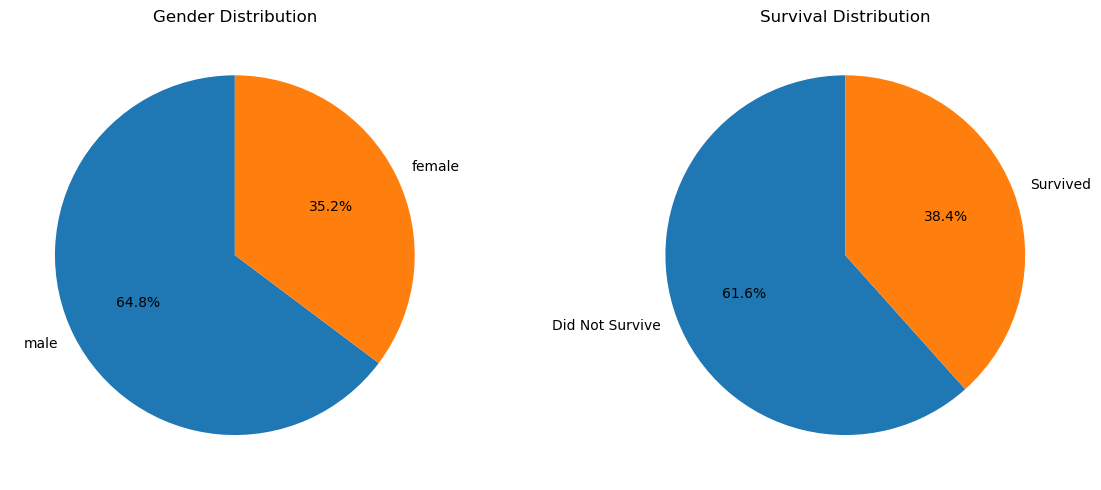

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gender pie
# Count males vs females
gender_counts = df['Sex'].value_counts()
gender_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel='',
    ax=axes[0]
)
axes[0].set_title('Gender Distribution')

# Survival pie
survival = df['Survived'].value_counts()
survival.index = ['Did Not Survive', 'Survived']
survival.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel='',
    ax=axes[1]
)
axes[1].set_title('Survival Distribution')

plt.tight_layout()
plt.show()


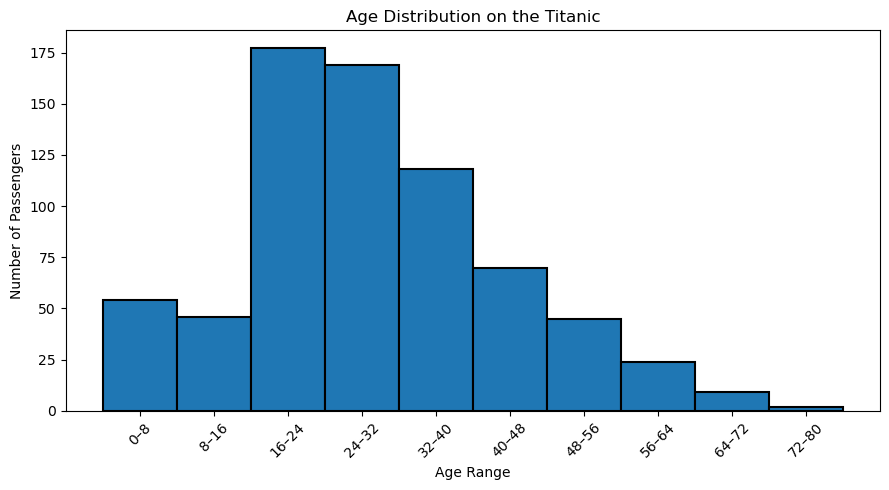

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Clean age data
ages = df['Age'].dropna()

# Create histogram data
counts, bin_edges = np.histogram(ages, bins=10)

# Plot histogram with bold edges
plt.figure(figsize=(9, 5))
plt.hist(
    ages,
    bins=10,
    edgecolor='black',
    linewidth=1.5
)

plt.xlabel('Age Range')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution on the Titanic')

# Create bin labels (start–end)
bin_labels = [
    f"{int(bin_edges[i])}–{int(bin_edges[i+1])}"
    for i in range(len(bin_edges) - 1)
]

# Set x-ticks at bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.xticks(bin_centers, bin_labels, rotation=45)

plt.tight_layout()
plt.show()


C:\Users\noaka\AppData\Local\Temp\ipykernel_20616\3093096122.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['AgeBin', 'Survived'])


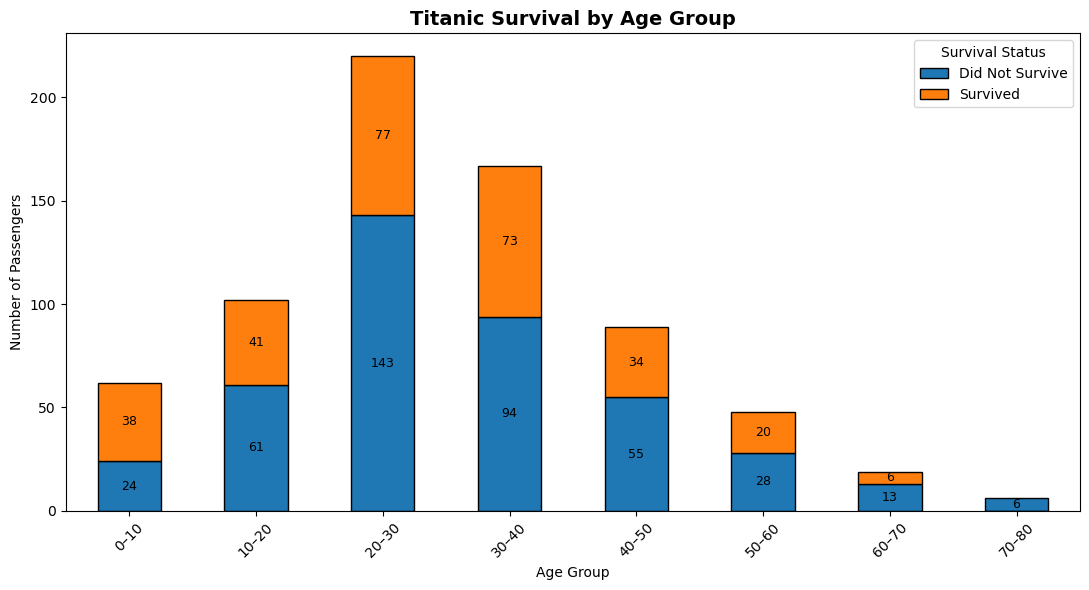

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. Prepare the data
# -------------------------

# Keep only needed columns and drop missing ages
df_age = df[['Age', 'Survived']].dropna()

# Define exact age bins
bins = np.arange(0, 81, 10)   # 0–10, 10–20, ..., 70–80
labels = [f"{bins[i]}–{bins[i+1]}" for i in range(len(bins) - 1)]

# Create age groups
df_age['AgeBin'] = pd.cut(df_age['Age'], bins=bins, labels=labels, right=False)

# -------------------------
# 2. Count survival per bin
# -------------------------

age_survival = (
    df_age
    .groupby(['AgeBin', 'Survived'])
    .size()
    .unstack(fill_value=0)
)

age_survival.columns = ['Did Not Survive', 'Survived']

# -------------------------
# 3. Plot stacked bar chart
# -------------------------

fig, ax = plt.subplots(figsize=(11, 6))

age_survival.plot(
    kind='bar',
    stacked=True,
    edgecolor='black',
    linewidth=1,
    ax=ax
)

# Labels & title
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Passengers')
ax.set_title('Titanic Survival by Age Group', fontsize=14, weight='bold')

ax.set_xticklabels(age_survival.index, rotation=45)

# -------------------------
# 4. Add count labels
# -------------------------

for i, age_bin in enumerate(age_survival.index):
    bottom = 0
    for value in age_survival.loc[age_bin]:
        if value > 0:
            ax.text(
                i,
                bottom + value / 2,
                str(value),
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
            bottom += value

# -------------------------
# 5. Final polish
# -------------------------

ax.legend(title='Survival Status')
plt.tight_layout()
plt.show()
